In [1]:
import os
os.environ["https_proxy"] = "http://127.0.0.1:8123"

In [2]:
import requests
from bs4 import BeautifulSoup

url = "https://github.com/trending"

def statistics(since="", spoken_language_code=""):
    params = {"spoken_language_code": spoken_language_code, "since": since}
    r = requests.get(url, params)
    if r.status_code != 200:
        return
    
    soup = BeautifulSoup(r.text, "html.parser")
    
    m = dict()
    for line in soup.find_all("article"):
        lst = [span.string for span in line.find_all("span") if span.get("itemprop") == "programmingLanguage"]
        pl = "none"
        if len(lst) > 0:
            pl = lst[0]
        if pl not in m:
            m[pl] = 0
        m[pl] += 1
    
    return m

In [3]:
from datetime import datetime
import pandas as pd

def statistics_by_spoken_language(spoken_language_code=""):
    daily = statistics(since="daily", spoken_language_code=spoken_language_code)
    weekly = statistics(since="weekly", spoken_language_code=spoken_language_code)
    monthly = statistics(since="monthly", spoken_language_code=spoken_language_code)
    
    dat = dict()
    for idx, d in enumerate([daily, weekly, monthly]):
        for k, v in d.items():
            if k not in dat:
                dat[k] = [0, 0, 0]
            dat[k][idx] = v
    
    pl = "any"
    if spoken_language_code != "":
        pl = spoken_language_code
    title = f"Spoken Language: {pl} - {now()}"
    
    df = pd.DataFrame.from_dict(dat, orient="index", columns=["daily", "weekly", "monthly"])
    df.plot.bar(title=title)
    
def now():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

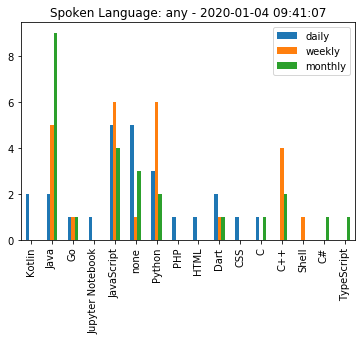

In [4]:
statistics_by_spoken_language("")

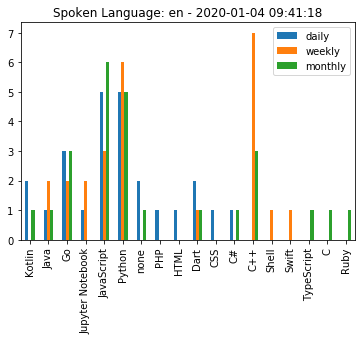

In [5]:
statistics_by_spoken_language("en")

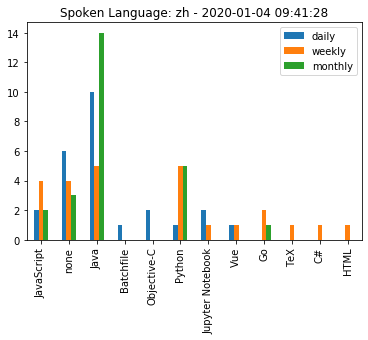

In [6]:
statistics_by_spoken_language("zh")